In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_stock(stock,start,end):
     # return web.DataReader(stock,'google',start,end)['Close']
    return web.DataReader(stock,'iex',start,end)[['close']]

In [3]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    # rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
    #      pd.stats.moments.ewma(d, com=period-1, adjust=False)
    rs = u.ewm(com=period-1, adjust=False).mean() / \
         d.ewm(com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)

In [4]:
from datetime import datetime as dt
now = dt.today().strftime("%Y-%m-%d")
start_date = '2018-01-01'
end_date = now
stock_name = 'AAPL'

In [5]:
df = get_stock(stock_name, start_date, end_date)

In [6]:
# df['RSI'] = RSI(df['Close'], 14)
df['RSI'] = RSI(df['close'], 14)
df.tail()

,close,RSI
date,,
2018-11-05,200.8891,36.493279
2018-11-06,203.0615,38.788661
2018-11-07,209.2200,44.871816
2018-11-08,208.4900,44.309697
2018-11-09,204.4700,41.245484


In [7]:
stock = df['close']
rsi = df['RSI']

In [8]:
mask = (df['RSI'] > 30) & (df['RSI'] < 70)
dff = df[mask]
stock_1 = dff['close']
rsi_1 = dff['RSI']

In [9]:
df.head()

,close,RSI
date,,
2018-01-02,169.7120,NaN
2018-01-03,169.6825,NaN
2018-01-04,170.4707,NaN
2018-01-05,172.4115,NaN
2018-01-08,171.7711,NaN


In [10]:
dff.head()

,close,RSI
date,,
2018-01-23,174.4213,68.998459
2018-01-24,171.6430,55.580703
2018-01-25,168.5790,45.152362
2018-01-26,168.9731,46.541702
2018-01-29,165.4756,37.470309


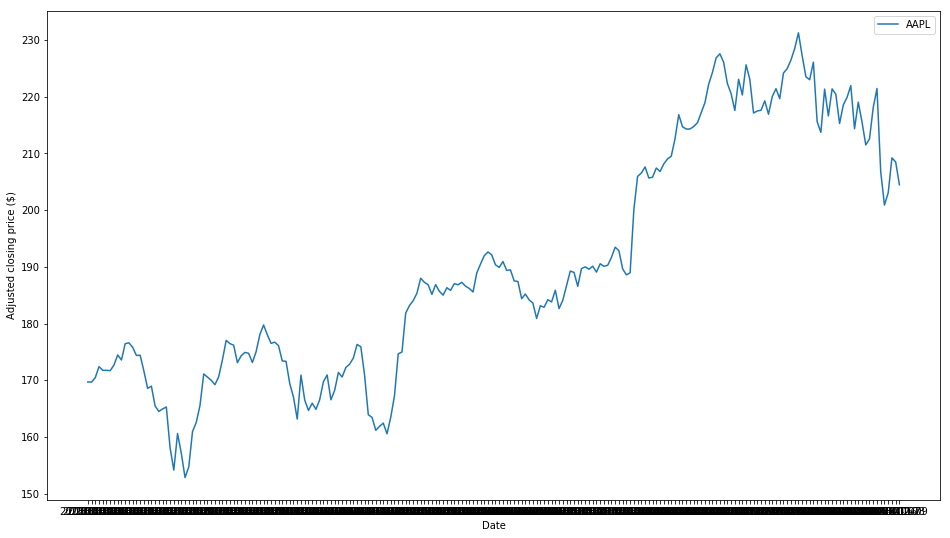

In [11]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(stock.index, stock, label=stock_name)

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

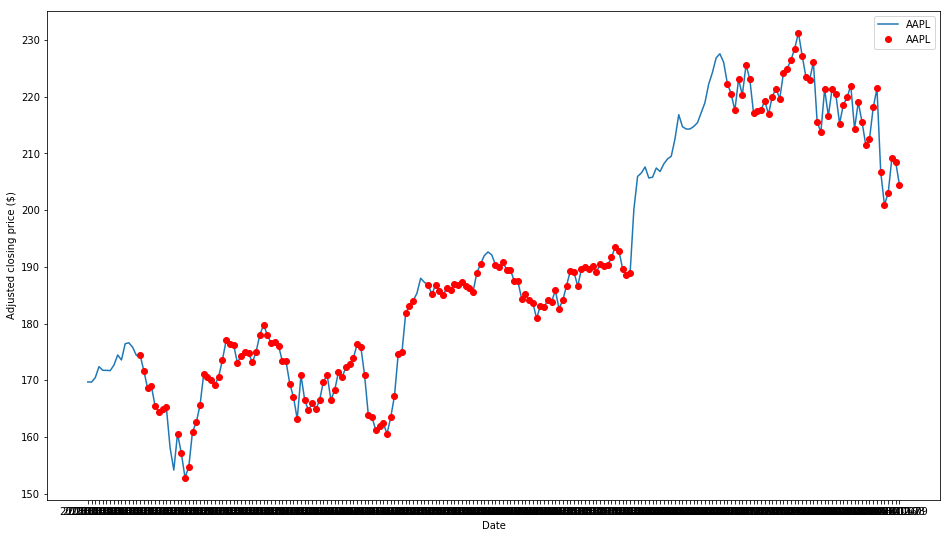

In [12]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(stock.index, stock, label=stock_name)
ax.plot(stock_1.index, stock_1, 'ro', label=stock_name)

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

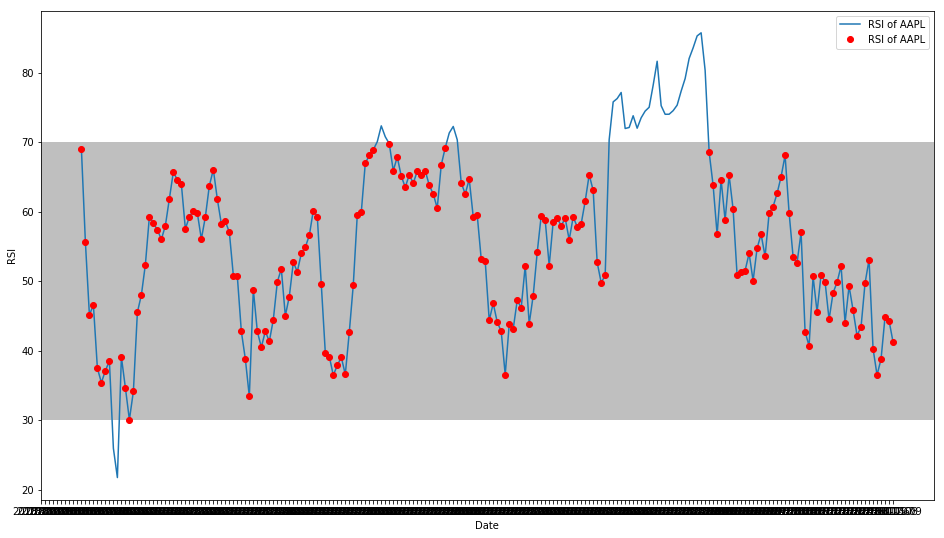

In [13]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(rsi.index, rsi, label='RSI of '+stock_name)
ax.plot(rsi_1.index, rsi_1, 'ro', label='RSI of '+stock_name)
ax.axhspan(30, 70, facecolor='0.5', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.legend()

In [14]:
mask = (df.index > '2018-01-01') & (df.index < '2018-10-01')
dff = df[mask]
stock = dff['close']
rsi = dff['RSI']

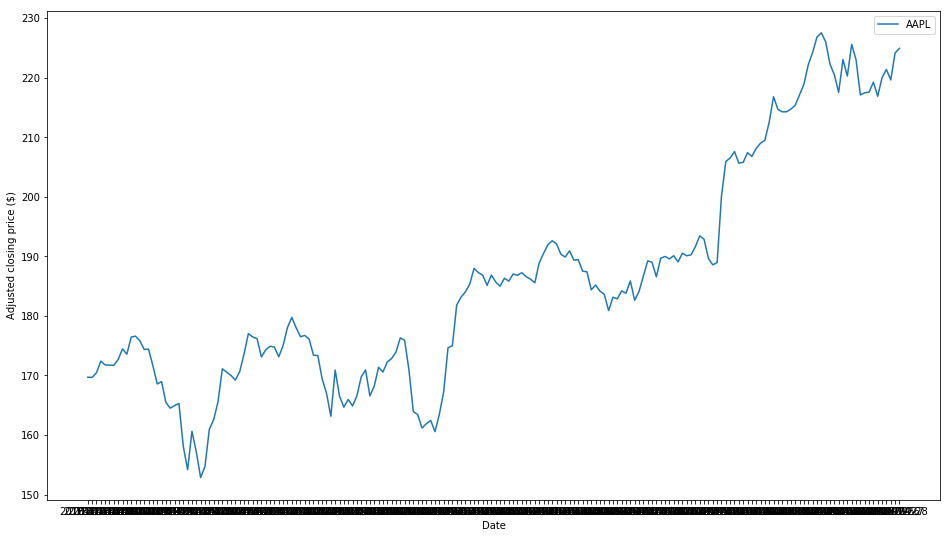

In [15]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(stock.index, stock, label=stock_name)

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

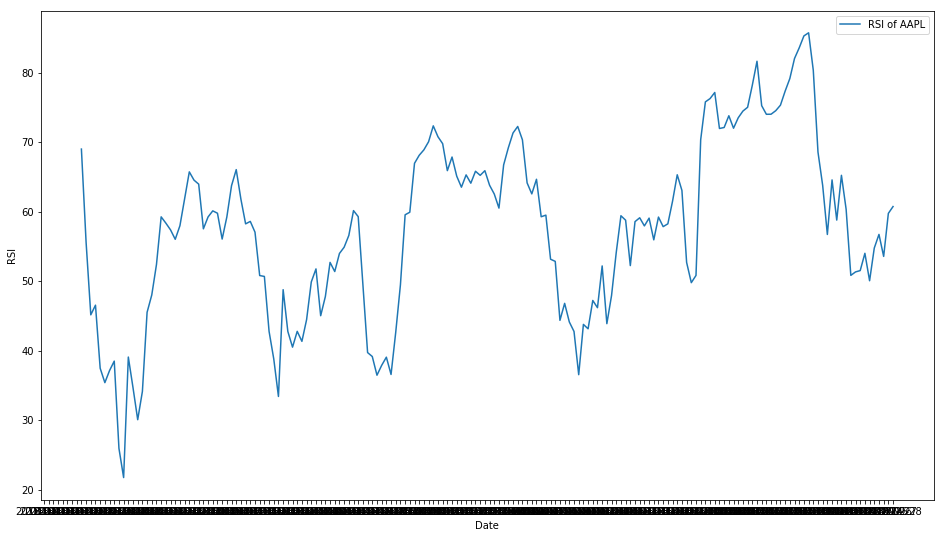

In [16]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(rsi.index, rsi, label='RSI of '+stock_name)

ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.legend()